import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as skim
from skimage import io
from skimage.util import crop
import matplotlib.image as mpimg

definition function

In [2]:
def thresholding(thresh,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>thresh and img[i,j][1]>thresh and img[i,j][2]>thresh ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [3]:
def thresholding_2value(min_th,max_th,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>max_th and img[i,j][1]>max_th and img[i,j][2]>max_th ):
                new_img[i,j] = [255,255,255]
            if(img[i,j][0]<min_th and img[i,j][1]<min_th and img[i,j][2]<min_th ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [4]:
def find_length(img,position = True): #input must thresholding before
    nrow, ncol, ncolor  = img.shape
    right_position = []
    left_position = []
    #find all left side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0] < 255 ):
                temp1.append((i,j))
                break
    #find true left side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    min_col = np.min(temp2)
    #find center true left side
    temp3 = []
    for i in range(nrow):
        if(img[i,min_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    left_position = [min_row,min_col]
    # print(left_position)

    #find all right side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            i_inverse = (nrow-1) - i
            j_inverse = (ncol-1) - j
            if(img[i_inverse,j_inverse][0] < 255 ):
                temp1.append((i_inverse,j_inverse))
                break
    #find true right side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    max_col = np.max(temp2)
    #find center true right side
    temp3 = []
    for i in range(nrow):
        if(img[i,max_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    right_position = [min_row,max_col]
    if(position == True):
        print(left_position)
        print(right_position)

    #find length with pythagoras theorem
    base = np.abs(right_position[1] - left_position[1])
    perp = np.abs(left_position[0] - right_position[0])
    length = np.hypot(base, perp)
    # print("length of picture is " , length , str("pixel"))
    return length
    

In [5]:
def plot_compare_img(img1,img2):
    plt.figure(figsize=(20,10))
    plt.subplot(121), plt.imshow(img1), plt.axis('off') 
    plt.subplot(122), plt.imshow(img2), plt.axis('off') 
    plt.show()  

In [6]:
def plot_histogram(img):
    _ = plt.hist(img.ravel(), bins = 256, color = 'orange', )
    _ = plt.hist(img[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    _ = plt.hist(img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    _ = plt.hist(img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
    _ = plt.xlabel('Intensity Value')
    _ = plt.ylabel('Count')
    _ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
    plt.show()

In [13]:
def pixel_to_cm(pixel):
    return (pixel*0.5)/58

make measure image

In [8]:
def_img = io.imread("image\\11.26.2020 Heptane-0.06mM Triton x-100\\frame 3\\2-21-04 PM\\11.26.2020 (3) 0264.jpg", as_gray=False)
def_img.shape

(1080, 1920, 3)

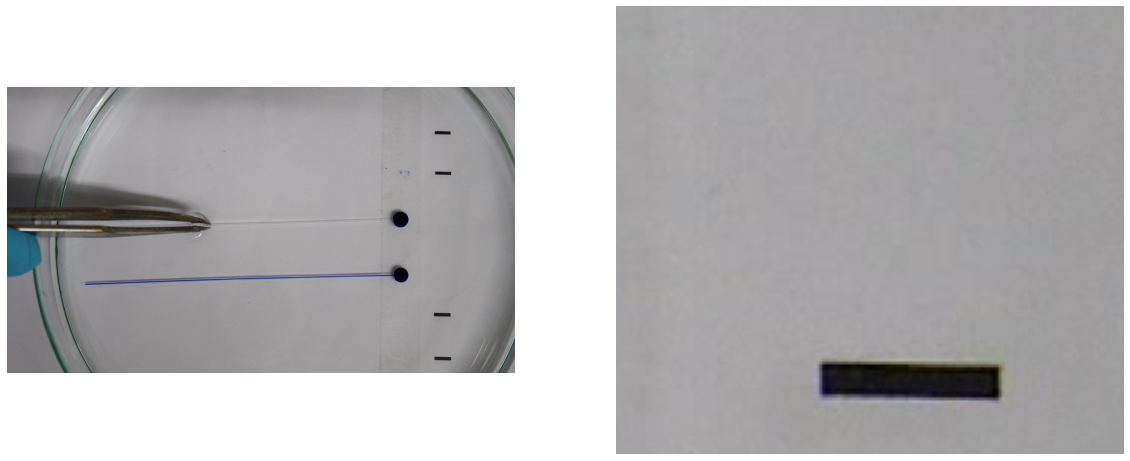

In [10]:
measure_im = crop(def_img, ((200, 730), (1550, 200), (0,0)), copy=False)
# print(def_img.shape, measure_im.shape)
plot_compare_img(def_img,measure_im)

In [11]:
# plot_histogram(measure_im)

[125, 69]
[126, 127]


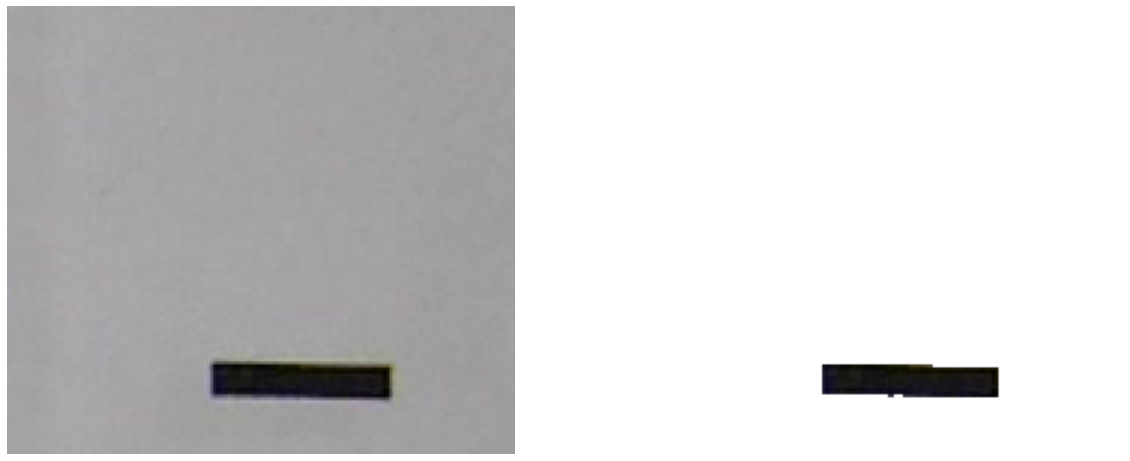

length of picture is  58.008620049092706 pixel


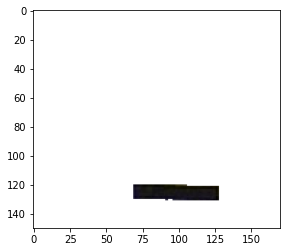

In [12]:
thresh_measure_im = thresholding(50,measure_im)
l = find_length(thresh_measure_im)
plot_compare_img(measure_im,thresh_measure_im)
plt.imshow(thresh_measure_im)
print("length of picture is " , l , str("pixel"))

58 pixel = 0.5 cm

x pixel = y cm


y cm = (x pixel* 0.5) / 58


find definition length first picture

(1080, 1920, 3) (150, 780, 3)


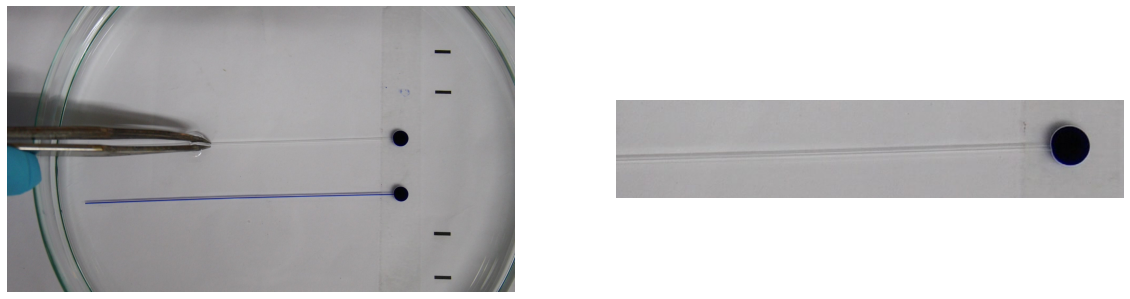

In [28]:
def_crop_im = crop(def_img, ((430, 500), (790, 350), (0,0)), copy=False)
print(def_img.shape, def_crop_im.shape)
plot_compare_img(def_img,def_crop_im)

In [29]:
# plot_histogram(def_crop_im)

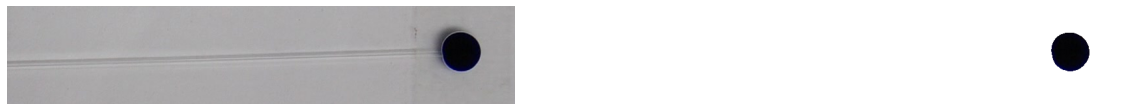

In [30]:
Tdef_img2 = thresholding(45,def_crop_im)
plot_compare_img(def_crop_im,Tdef_img2)


[68, 668]
[71, 726]
ldef  58.077534382926416 pixel


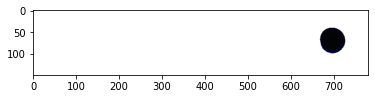

In [31]:
ldef = find_length(Tdef_img2)
plt.imshow(Tdef_img2)
print("ldef " , ldef , str("pixel"))

find length on crop value 1 from 264 to 390

In [32]:
number_of_picture = 264
thresh = 45
template1 = []
l_def = 58.077534382926416
for i in range(390-264+1):
    if(True) :   
        image = mpimg.imread( "image\\11.26.2020 Heptane-0.06mM Triton x-100\\frame 3\\2-21-04 PM\\11.26.2020 (3) " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((430, 500), (790, 350), (0,0)), copy=False)
        thresh_image = thresholding(thresh,crop_image)
        # plot_compare_img(crop_image,thresh_image)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        template1.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)
        # for i in range(len(template1)/2):
        #     if(template1[i] > 70):


In [33]:
print(template1)
print(len(template1))

[0, 1, 2, 4, 6, 13, 18, 25, 32, 41, 48, 56, 63, 69, 76, 82, 88, 95, 101, 106, 113, 119, 124, 130, 136, 143, 147, 153, 158, 163, 168, 172, 178, 183, 189, 194, 199, 204, 208, 213, 219, 223, 228, 232, 236, 240, 245, 249, 253, 670, 670, 265, 268, 271, 668, 669, 668, 669, 667, 668, 669, 668, 667, 666, 668, 666, 668, 669, 335, 669, 667, 669, 666, 665, 669, 669, 663, 668, 669, 668, 668, 669, 669, 669, 669, 669, 668, 668, 668, 668, 668, 668, 432, 436, 440, 443, 448, 452, 456, 459, 463, 467, 471, 475, 479, 483, 487, 491, 494, 498, 502, 506, 510, 513, 516, 520, 524, 527, 531, 535, 539, 543, 546, 550, 554, 557, 561]
127


find length on crop value 2 from 391 to 1680

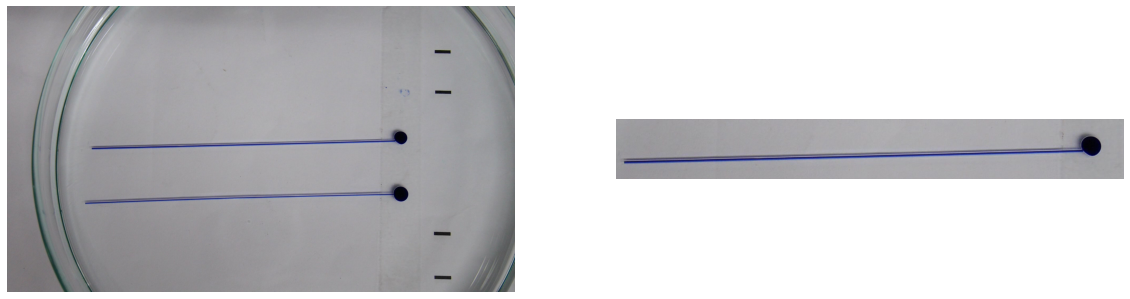

In [39]:
image = mpimg.imread( "image\\11.26.2020 Heptane-0.06mM Triton x-100\\frame 3\\2-21-04 PM\\11.26.2020 (3) " + str(1680).zfill(4) + ".jpg" )
crop_image = crop(image, ((430, 500), (300, 350), (0,0)), copy=False)
plot_compare_img(image,crop_image)

In [40]:
number_of_picture = 391
thresh = 45
template2 = []
l_def = 58.077534382926416
for i in range(1680-391+1):
    if( True) :
        image = mpimg.imread( "image\\11.26.2020 Heptane-0.06mM Triton x-100\\frame 3\\2-21-04 PM\\11.26.2020 (3) " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((430, 500), (300, 350), (0,0)), copy=False)
        if(True):
            thresh_image = thresholding(thresh,crop_image)
        else:
            thresh_image = thresholding(40,crop_image)
        # plot_compare_img(crop_image,thresh_image)
        # print(i)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        template2.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)

In [41]:
print(template2)
print(len(template2))

[565, 568, 571, 575, 578, 582, 585, 589, 593, 596, 600, 603, 606, 610, 614, 617, 621, 624, 627, 631, 634, 637, 641, 644, 648, 651, 656, 659, 663, 666, 670, 674, 677, 681, 684, 688, 691, 695, 698, 702, 705, 709, 712, 715, 718, 722, 725, 729, 733, 736, 739, 743, 746, 749, 752, 755, 759, 762, 765, 769, 771, 774, 778, 781, 783, 786, 789, 793, 795, 799, 802, 805, 808, 811, 815, 818, 821, 824, 827, 830, 833, 836, 839, 842, 845, 848, 851, 854, 857, 860, 863, 866, 869, 872, 875, 878, 880, 883, 887, 889, 892, 895, 898, 901, 904, 906, 909, 912, 915, 917, 920, 923, 926, 928, 931, 934, 936, 939, 942, 945, 947, 949, 952, 954, 956, 959, 961, 963, 965, 968, 970, 972, 975, 977, 979, 981, 983, 985, 987, 989, 991, 993, 995, 997, 999, 1000, 1002, 1004, 1006, 1007, 1009, 1011, 1013, 1014, 1016, 1018, 1019, 1021, 1023, 1025, 1026, 1028, 1029, 1031, 1032, 1034, 1036, 1037, 1039, 1040, 1041, 1043, 1045, 1046, 1047, 1049, 1050, 1052, 1053, 1055, 1056, 1058, 1059, 1061, 1062, 1064, 1065, 1065, 1067, 1069, 1071

concat 2 template and calculate pixel to centimeter

In [42]:
l_array = np.concatenate((template1,template2), axis=0)
# print(l_array)
# print(type(l_array[1]))
# print(l_array.shape)
l_array = l_array.astype('float32')

#find missing value and set to 0
for i in range(len(l_array)):
    if(l_array[i] < 0 ):
        l_array[i] = 0

for i in range(len(l_array)):
    l_array[i] = pixel_to_cm(l_array[i])

In [43]:
print(l_array)

[0.0000000e+00 8.6206896e-03 1.7241379e-02 ... 9.7672415e+00 9.7672415e+00
 9.7672415e+00]


export data to exel

In [44]:
import pandas as pd

In [45]:
print(len(l_array))

1417


In [46]:
data = []
num_img = 264
for i in range(len(l_array)):
    data.append(( " 11.26.2020 (3) " + str(num_img + i).zfill(4)  ,l_array[i] )) 
# print(data)
dataframe = pd.DataFrame(data, 
             columns=['image_name', 
                      'length(cm)'])
# print(dataframe)
# writing to Excel
datatoexcel = pd.ExcelWriter('HeptaneTRITON-0.06(3)_11.26.2020_2-21-04-PM.xlsx')
# write DataFrame to excel 
dataframe.to_excel(datatoexcel)
#save the excel
datatoexcel.save()


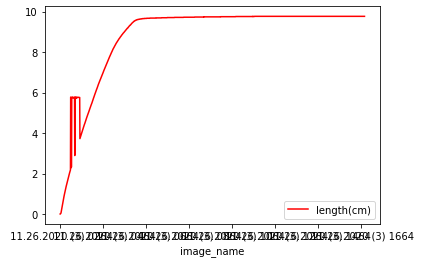

In [47]:
dataframe.plot(kind='line',x='image_name',y='length(cm)',color='red')
plt.show()